In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import base64
import requests
import glob
import json
import time

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO, BytesIO
from matplotlib import pyplot as plt
from PIL import Image

from urllib.parse import urlencode
from urllib.request import Request, urlopen



<IPython.core.display.Javascript object>


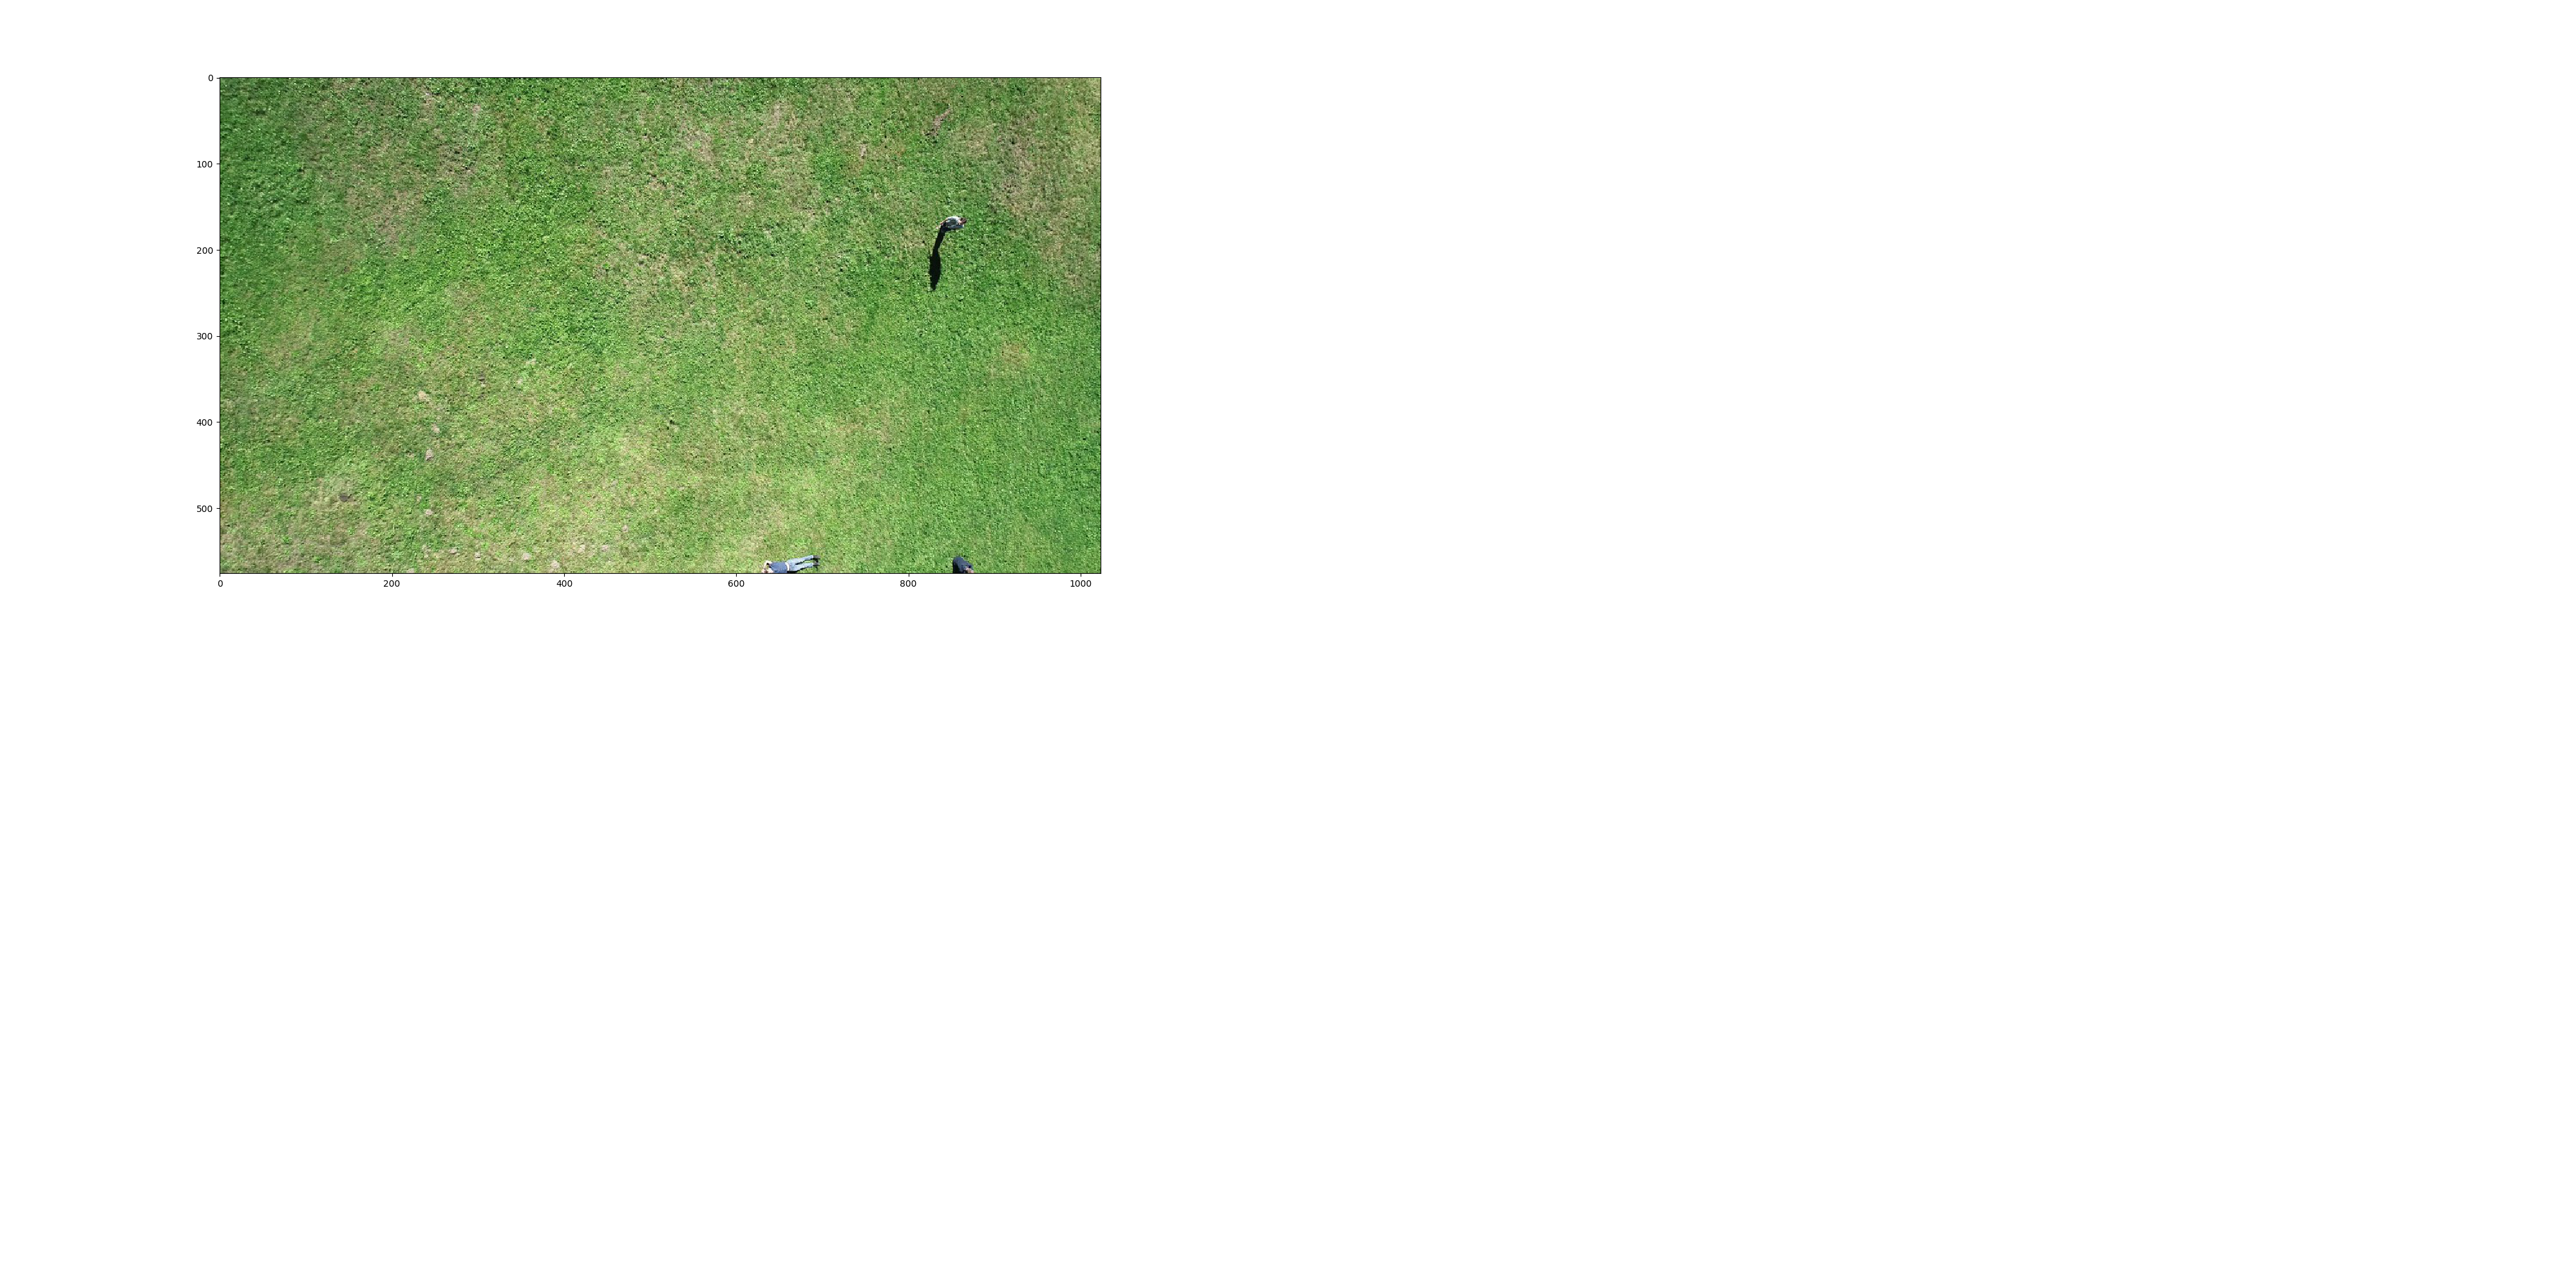

In [2]:
%matplotlib notebook

fig = plt.figure(figsize=(20, 10))
fig.show()

In [ ]:
url = 'http://localhost:5000/detect'

for filename in glob.glob('pictures/*.jpg'): #assuming gif
    im=Image.open(filename)
    buffered = BytesIO()
    im.save(buffered, format="JPEG")
    img_str = base64.b64encode(buffered.getvalue())
    print(filename)
    #print(img_str)
    
    
    json_string = {
      'name': filename,
      'data': img_str.decode('utf-8'),
      'coordinates': {
        'lat': 123.5,
        'lng': 123.2
      }
    }
    #print(json_string)
        
    plt.imshow(im)
    fig.canvas.draw()
    
    
    json_string = json.dumps(json_string)
    r = requests.post(url, data=json_string)
    
    print(r.status_code, r.reason)
    obj = json.loads(r.content)
    # print(obj)
    i2 = Image.open(BytesIO(base64.b64decode(obj['data'])))
    plt.imshow(i2)
    fig.canvas.draw()

    #time.sleep(1)

pictures/img_060.jpg
200 OK
pictures/img_058.jpg
200 OK
pictures/img_066.jpg
200 OK
pictures/img_067.jpg
